In [2]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [3]:
def fibonacci_sphere(R=1.0, samples=1):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        y = R*(1 - (i / float(samples - 1)) * 2)  # y goes from 1 to -1
        radius = math.sqrt(R*R - y * y)  # radius at y

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * radius
        z = math.sin(theta) * radius

        points.append([x, y, z])

    return points



def trimer(R=1.0, samples=1):

    points = []
    phi = math.pi * (360 + 10*1.55)/180/3  # twist angle in radians
    rise = 10 * 4.75/1000/3                    # rise in kA

    for i in range(samples):
        z = i*rise  # y goes from 1 to -1

        theta = phi * i  # golden angle increment

        x = math.cos(theta) * R
        y = math.sin(theta) * R

        points.append([x, y, z])

    return points

def fibonacci_cylinder(R=1.0, samples=1, rise=0.02):

    points = []
    phi = math.pi * (3. - math.sqrt(5.))  # golden angle in radians

    for i in range(samples):
        z = i*rise  # y goes from 1 to -1
        theta = phi * i  # golden angle increment

        x = math.cos(theta) * R
        y = math.sin(theta) * R

        points.append([x, y, z])

    return points

In [4]:
from scipy import integrate
import scipy.io as sio
import matplotlib.colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [4]:
r_i = 0.1
r_o = 0.6#1.1
D_o=30
k_in = 2
coef = k_in/4/np.pi
lamb0 = 1+coef/D_o*(-1/(r_o-r_i))
x = np.arange(20,400,10)
D_in = range(1,31)


rate=[]
for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    lambN = []
    y1 = lambda t: t**(-D_i/D_p)/(r_o-r_i*t)
    lamb1=-2/D_p/(r_o-r_i)+(D_m/D_p**2)*(integrate.quad(y1, 0, 1)[0])
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_i/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    for N in x:
        pos_B=fibonacci_sphere(r_o,N)
        pos_E=fibonacci_sphere(r_i,N)
        lamb=lamb1
        for j in range(1,N):
            vec1 = np.subtract(pos_B[0], pos_B[j])
            vec2 = np.subtract(pos_B[0], pos_E[j])
            lamb += 2/D_p/np.sqrt(np.dot(vec1,vec1)) - 2/D_p/np.sqrt(np.dot(vec2,vec2)) - \
                (D_m/D_p**2)* \
                (integrate.quad(y2, 0, 1,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_B[j][0],pos_B[j][1],pos_B[j][2]))[0] - \
                 integrate.quad(y2, 0, 1,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_E[j][0],pos_E[j][1],pos_E[j][2]))[0])

        lambN.append(lamb0/(1+coef*lamb))
    rate.append(lambN)
np.savetxt("D_sph_cpeb_k2.dat",rate)

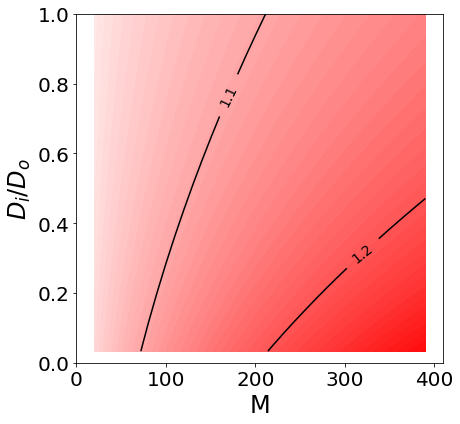

In [202]:
x = np.arange(20,400,10)
D_in = range(1,31)

rate=np.loadtxt("D_sph_cpeb_k2.dat")
plt.figure(figsize=(6.5,6))


Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-0.12, 0.12, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-0.12, 0.12, num=101, endpoint=True, base=10)

CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[1.0, 1.1, 1.2],colors='k')
plt.clabel(CS, inline=1, fontsize=14,fmt='%.1f',inline_spacing=10)
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)



plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,410)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[1.0, 1.1, 1.2,round(np.max(rate),1)])
# cbar.set_label(label="$c^B_M/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
plt.savefig("al_D_sph_cpeb_k2.png")

In [6]:
r_i = 0.1
r_o = 0.6#1.1
D_o=30
k_in = 0.2
coef = k_in/4/np.pi
lamb0 = 1+coef/D_o*(-1/(r_o-r_i))
x = np.arange(20,400,10)
D_in = range(1,31)


rate=[]
for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    lambN = []
    y1 = lambda t: t**(-D_i/D_p)/(r_o-r_i*t)
    lamb1=-2/D_p/(r_o-r_i)+(D_m/D_p**2)*(integrate.quad(y1, 0, 1)[0])
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_i/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    for N in x:
        pos_B=fibonacci_sphere(r_o,N)
        pos_E=fibonacci_sphere(r_i,N)
        lamb=lamb1
        for j in range(1,N):
            vec1 = np.subtract(pos_B[0], pos_B[j])
            vec2 = np.subtract(pos_B[0], pos_E[j])
            lamb += 2/D_p/np.sqrt(np.dot(vec1,vec1)) - 2/D_p/np.sqrt(np.dot(vec2,vec2)) - \
                (D_m/D_p**2)* \
                (integrate.quad(y2, 0, 1,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_B[j][0],pos_B[j][1],pos_B[j][2]))[0] - \
                 integrate.quad(y2, 0, 1,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_E[j][0],pos_E[j][1],pos_E[j][2]))[0])

        lambN.append(lamb0/(1+coef*lamb))
    rate.append(lambN)
np.savetxt("D_sph_cpeb_k0.2.dat",rate)

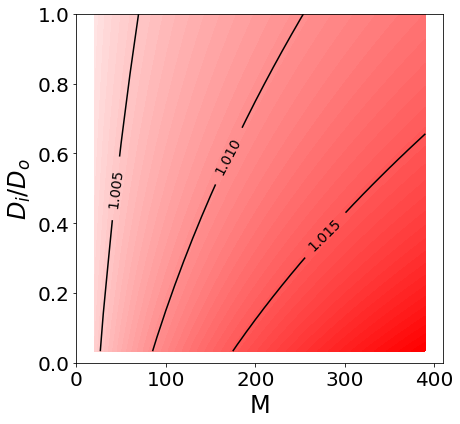

In [205]:
x = np.arange(20,400,10)
D_in = range(1,31)
rate=np.loadtxt("D_sph_cpeb_k0.2.dat")


#plt.figure(figsize=(8,6))
plt.figure(figsize=(6.5,6))

Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-0.01, 0.01, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-0.01, 0.01, num=101, endpoint=True, base=10)

CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[1.0, 1.005, 1.01, 1.015],colors='k')
plt.clabel(CS, inline=1, fontsize=14,fmt='%.3f',inline_spacing=10)
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)


plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,410)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[1.0, 1.005, 1.01, 1.015, 1.021,round(np.max(rate),3)])
# cbar.set_label(label="$\overline{c^B_M}/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
# plt.savefig("D_sph_cpeb_k0.2.png")
plt.savefig("al_D_sph_cpeb_k0.2.png")

In [7]:
r_i = 0.1
r_o = 0.6#1.1
rk = r_o/r_i
D_o=30
k_in = 2
coef = k_in/4/np.pi
lamb0 = 1+coef/D_o*(-1/(r_o-r_i))
x = np.arange(20,400,10)
D_in = range(1,31)


rate=[]
for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    lambN = []
    y1 = lambda t: t**(-D_o/D_p)/(r_o*t-r_i)
    lamb1=-2/D_p/(r_o-r_i)+(D_m/D_p**2)*(integrate.quad(y1, 1, np.inf)[0])
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_o/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    for N in x:
        pos_E=fibonacci_sphere(r_o,N)
        pos_B=fibonacci_sphere(r_i,N)
        lamb=lamb1
        for j in range(1,N):
            vec1 = np.subtract(pos_B[0], pos_B[j])
            vec2 = np.subtract(pos_B[0], pos_E[j])
            vec3 = np.subtract(pos_B[0], [rk**2*pos_B[j][0],rk**2*pos_B[j][1],rk**2*pos_B[j][2]])
            lamb += 1/D_i/np.sqrt(np.dot(vec1,vec1))-rk*D_m/D_p/D_i/np.sqrt(np.dot(vec3,vec3)) - 2/D_p/np.sqrt(np.dot(vec2,vec2)) - \
                (D_m/D_p**2)* \
                (rk*integrate.quad(y2, 1, np.inf,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],rk**2*pos_B[j][0],rk**2*pos_B[j][1],rk**2*pos_B[j][2]))[0] - \
                 integrate.quad(y2, 1, np.inf,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_E[j][0],pos_E[j][1],pos_E[j][2]))[0])

        lambN.append(lamb0/(1+coef*lamb))
    rate.append(lambN)
np.savetxt("D_sph_rim_k2.dat",rate)

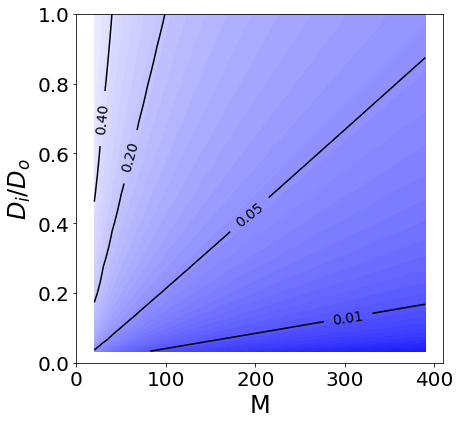

In [203]:
x = np.arange(20,400,10)
D_in = range(1,31)
rate=np.loadtxt("D_sph_rim_k2.dat")

#plt.figure(figsize=(8,6))
plt.figure(figsize=(6.5,6))

Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-3, 3, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-3, 3, num=101, endpoint=True, base=10)


manual_l=[(300,0.2),(200,0.4),(50,0.6),(30,0.7)]

CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[0.01,0.05,0.2,0.4],colors='k')
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)
plt.clabel(CS, inline=1, fontsize=14,fmt='%.2f',inline_spacing=10,manual=manual_l)



plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,410)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[np.min(rate),0.01,0.05,0.2,0.4,1])
# cbar.set_label(label="$\overline{c^B_M}/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
#plt.savefig("D_sph_rim_k2.png")
plt.savefig("al_D_sph_rim_k2.png")

In [11]:
r_i = 0.1
r_o = 0.6#1.1
rk = r_o/r_i
D_o=30
k_in = 0.2
coef = k_in/4/np.pi
lamb0 = 1+coef/D_o*(-1/(r_o-r_i))
x = np.arange(20,400,10)
D_in = range(1,31)


rate=[]
for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    lambN = []
    y1 = lambda t: t**(-D_o/D_p)/(r_o*t-r_i)
    lamb1=-2/D_p/(r_o-r_i)+(D_m/D_p**2)*(integrate.quad(y1, 1, np.inf)[0])
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_o/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    for N in x:
        pos_E=fibonacci_sphere(r_o,N)
        pos_B=fibonacci_sphere(r_i,N)
        lamb=lamb1
        for j in range(1,N):
            vec1 = np.subtract(pos_B[0], pos_B[j])
            vec2 = np.subtract(pos_B[0], pos_E[j])
            vec3 = np.subtract(pos_B[0], [rk**2*pos_B[j][0],rk**2*pos_B[j][1],rk**2*pos_B[j][2]])
            lamb += 1/D_i/np.sqrt(np.dot(vec1,vec1))-rk*D_m/D_p/D_i/np.sqrt(np.dot(vec3,vec3)) - 2/D_p/np.sqrt(np.dot(vec2,vec2)) - \
                (D_m/D_p**2)* \
                (rk*integrate.quad(y2, 1, np.inf,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],rk**2*pos_B[j][0],rk**2*pos_B[j][1],rk**2*pos_B[j][2]))[0] - \
                 integrate.quad(y2, 1, np.inf,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_E[j][0],pos_E[j][1],pos_E[j][2]))[0])

        lambN.append(lamb0/(1+coef*lamb))
    rate.append(lambN)
np.savetxt("D_sph_rim_k0.2.dat",rate)

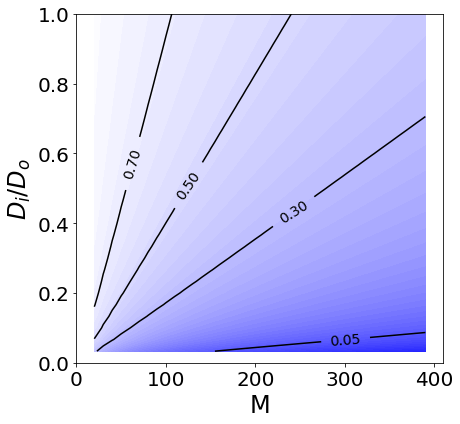

In [204]:
x = np.arange(20,400,10)
D_in = range(1,31)
rate=np.loadtxt("D_sph_rim_k0.2.dat")

#plt.figure(figsize=(8,6))
plt.figure(figsize=(6.5,6))


Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-2, 2, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-2, 2, num=101, endpoint=True, base=10)


manual_l=[(300,0.1),(250,0.4),(130,0.5),(30,0.6)]
CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[0.05,0.3,0.5,0.7],colors='k')
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)
plt.clabel(CS, inline=1, fontsize=14,fmt='%.2f',inline_spacing=10,manual=manual_l)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,410)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[round(np.min(rate),2),0.05,0.3,0.5,0.7,1])
# cbar.set_label(label="$\overline{c^B_M}/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
# plt.savefig("D_sph_rim_k0.2.png")
plt.savefig("al_D_sph_rim_k0.2.png")

In [6]:
r_i = 0.1
r_o = 0.6#1.1
D_o=30
k_in = 6
coef = k_in/4/np.pi
lamb0 = 1+coef/D_o*(-1/(r_o-r_i))
x = np.arange(20,400,10)
D_in = range(1,31)


rate=[]
for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    lambN = []
    y1 = lambda t: t**(-D_i/D_p)/(r_o-r_i*t)
    lamb1=-2/D_p/(r_o-r_i)+(D_m/D_p**2)*(integrate.quad(y1, 0, 1)[0])
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_i/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    for N in x:
        pos_B=fibonacci_sphere(r_o,N)
        pos_E=fibonacci_sphere(r_i,N)
        lamb=lamb1
        for j in range(1,N):
            vec1 = np.subtract(pos_B[0], pos_B[j])
            vec2 = np.subtract(pos_B[0], pos_E[j])
            lamb += 2/D_p/np.sqrt(np.dot(vec1,vec1)) - 2/D_p/np.sqrt(np.dot(vec2,vec2)) - \
                (D_m/D_p**2)* \
                (integrate.quad(y2, 0, 1,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_B[j][0],pos_B[j][1],pos_B[j][2]))[0] - \
                 integrate.quad(y2, 0, 1,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_E[j][0],pos_E[j][1],pos_E[j][2]))[0])

        lambN.append(lamb0/(1+coef*lamb))
    rate.append(lambN)
np.savetxt("D_sph_cpeb_k6.dat",rate)

In [7]:
r_i = 0.1
r_o = 0.6#1.1
rk = r_o/r_i
D_o=30
k_in = 6
coef = k_in/4/np.pi
lamb0 = 1+coef/D_o*(-1/(r_o-r_i))
x = np.arange(20,400,10)
D_in = range(1,31)


rate=[]
for D_i in D_in:
    D_p = D_o + D_i
    D_m = D_o - D_i
    lambN = []
    y1 = lambda t: t**(-D_o/D_p)/(r_o*t-r_i)
    lamb1=-2/D_p/(r_o-r_i)+(D_m/D_p**2)*(integrate.quad(y1, 1, np.inf)[0])
    y2 = lambda t,a1,a2,a3,b1,b2,b3: t**(-D_o/D_p)/((a1-b1*t)**2+(a2-b2*t)**2+(a3-b3*t)**2)**(0.5)
    for N in x:
        pos_E=fibonacci_sphere(r_o,N)
        pos_B=fibonacci_sphere(r_i,N)
        lamb=lamb1
        for j in range(1,N):
            vec1 = np.subtract(pos_B[0], pos_B[j])
            vec2 = np.subtract(pos_B[0], pos_E[j])
            vec3 = np.subtract(pos_B[0], [rk**2*pos_B[j][0],rk**2*pos_B[j][1],rk**2*pos_B[j][2]])
            lamb += 1/D_i/np.sqrt(np.dot(vec1,vec1))-rk*D_m/D_p/D_i/np.sqrt(np.dot(vec3,vec3)) - 2/D_p/np.sqrt(np.dot(vec2,vec2)) - \
                (D_m/D_p**2)* \
                (rk*integrate.quad(y2, 1, np.inf,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],rk**2*pos_B[j][0],rk**2*pos_B[j][1],rk**2*pos_B[j][2]))[0] - \
                 integrate.quad(y2, 1, np.inf,args=(pos_B[0][0],pos_B[0][1],pos_B[0][2],pos_E[j][0],pos_E[j][1],pos_E[j][2]))[0])

        lambN.append(lamb0/(1+coef*lamb))
    rate.append(lambN)
np.savetxt("D_sph_rim_k6.dat",rate)

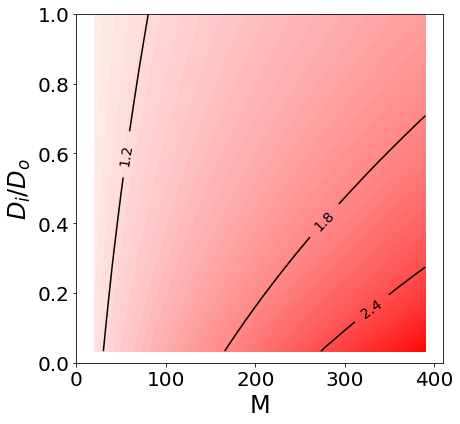

In [268]:
x = np.arange(20,400,10)
D_in = range(1,31)

rate=np.loadtxt("D_sph_cpeb_k6.dat")

#plt.figure(figsize=(8,6))
plt.figure(figsize=(6.5,6))


Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-0.55, 0.55, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-0.55, 0.55, num=101, endpoint=True, base=10)


manual_l=[(50,0.6),(280,0.4),(320,0.2)]
CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[1.2, 1.8, 2.4],colors='k')
plt.clabel(CS, inline=1, fontsize=14,fmt='%.1f',inline_spacing=10,manual=manual_l)
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)



plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,410)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[1.0, 1.2, 1.8, 2.4, round(np.max(rate),2)])
# cbar.set_label(label="$c^B_M/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
#plt.savefig("D_sph_cpeb_k6.png")
plt.savefig("al_D_sph_cpeb_k6.png")

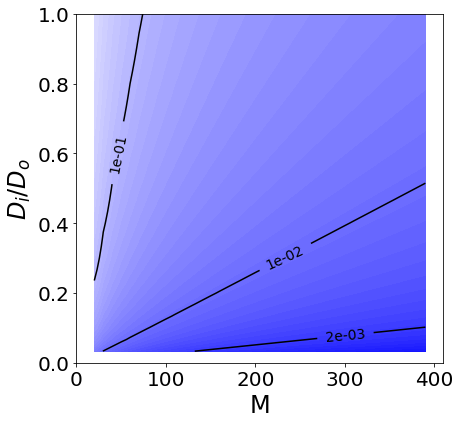

In [269]:
x = np.arange(20,400,10)
D_in = range(1,31)
rate=np.loadtxt("D_sph_rim_k6.dat")


#plt.figure(figsize=(8,6))
plt.figure(figsize=(6.5,6))

Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-3.5, 3.5, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-3.5, 3.5, num=101, endpoint=True, base=10)


manual_l=[(300,0.1),(250,0.2),(50,0.6)]

CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[2e-3,0.01, 0.1],colors='k')
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)
plt.clabel(CS, inline=1, fontsize=14,fmt='%.0e',inline_spacing=10,manual=manual_l)



plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,410)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[np.min(rate),2e-3,1e-2,0.1,1],format='%.0e')
# cbar.set_label(label="$c^B_M/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
#plt.savefig("D_sph_rim_k6.png")
plt.savefig("al_D_sph_rim_k6.png")

<font color=black size=6>**Cylinder model**</font>

In [207]:
mat = sio.loadmat('cylinder_COMSOL/r_cpeb_nk.mat')
np.shape(mat['r_cpeb'])

(4, 26, 30)

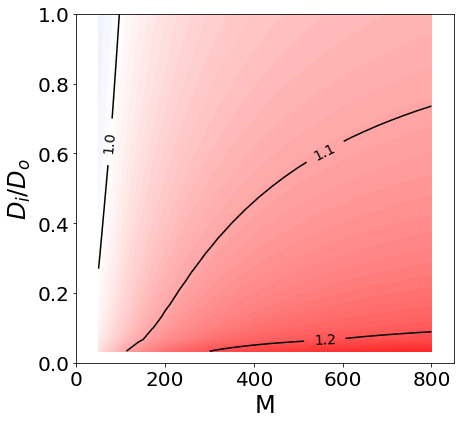

In [208]:
x = np.arange(50,801,30)
D_in = range(1,31)
D_o =30
rate = np.transpose(mat['r_cpeb'][2])
np.shape(rate)
#plt.figure(figsize=(8,6))
plt.figure(figsize=(6.5,6))


Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-0.12, 0.12, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-0.12, 0.12, num=101, endpoint=True, base=10)

CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[1.0, 1.1, 1.2],colors='k')
plt.clabel(CS, inline=1, fontsize=14,fmt='%.1f',inline_spacing=10)
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)



plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,850)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[0.9,1.0, 1.1, 1.2, round(np.max(rate),1)])
# cbar.set_label(label="$\overline{c^B_M}/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
#plt.savefig("D_cyl_cpeb_k2.png")
plt.savefig("al_D_cyl_cpeb_k2.png")

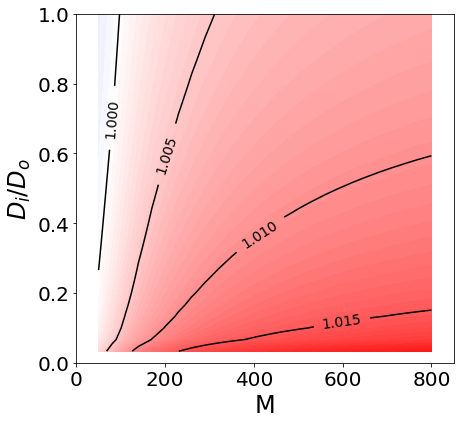

In [209]:
x = np.arange(50,801,30)
D_in = range(1,31)
D_o =30
rate = np.transpose(mat['r_cpeb'][-1])
np.shape(rate)
#plt.figure(figsize=(8,6))
plt.figure(figsize=(6.5,6))


Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-0.01, 0.01, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-0.01, 0.01, num=101, endpoint=True, base=10)




manual_l=[(100,0.7),(200,0.6),(400, 0.4),(600,0.1)]
CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[1.0, 1.005, 1.01, 1.015],colors='k')
plt.clabel(CS, inline=1, fontsize=14,fmt='%.3f',inline_spacing=10,manual=manual_l)
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)


plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,850)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[0.995,1.0, 1.005, 1.01, 1.015, round(np.max(rate),3), 1.023])
# cbar.set_label(label="$\overline{c^B_M}/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
#plt.savefig("D_cyl_cpeb_k0.2.png")
plt.savefig("al_D_cyl_cpeb_k0.2.png")

In [210]:
mat = sio.loadmat('cylinder_COMSOL/r_rim_nk.mat')
np.shape(mat['r_rim'])

(4, 26, 30)

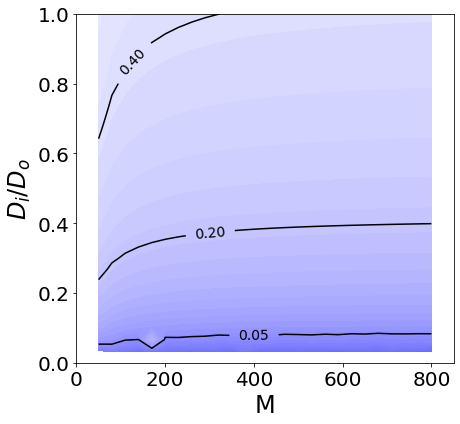

In [211]:
x = np.arange(50,801,30)
D_in = range(1,31)
D_o =30
rate = np.transpose(mat['r_rim'][2])
np.shape(rate)
#plt.figure(figsize=(8,6))
plt.figure(figsize=(6.5,6))


Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-3, 3, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-3, 3, num=101, endpoint=True, base=10)


manual_l=[(400,0.1),(300,0.4),(100,0.9)]

CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[0.05,0.2,0.4],colors='k')
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)
plt.clabel(CS, inline=1, fontsize=14,fmt='%.2f',inline_spacing=10,manual=manual_l)



plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,850)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[0.002,0.01,0.05,0.2,0.4,1],format='%.0e')
# cbar.set_label(label="$\overline{c^B_M}/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
#plt.savefig("D_cyl_rim_k2.png")
plt.savefig("al_D_cyl_rim_k2.png")

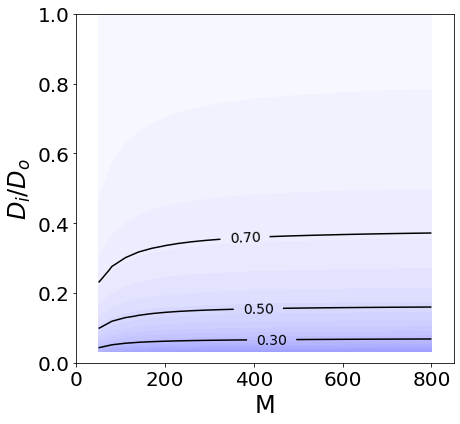

In [212]:
x = np.arange(50,801,30)
D_in = range(1,31)
D_o =30
rate = np.transpose(mat['r_rim'][-1])
np.shape(rate)
#plt.figure(figsize=(8,6))
plt.figure(figsize=(6.5,6))

Reds = cm.get_cmap('bwr', 100)
mycmap = matplotlib.colors.ListedColormap(Reds(range(100)))
a=np.logspace(-2, 2, num=101, endpoint=True, base=10)
norm = matplotlib.colors.BoundaryNorm(a, len(a)-1)
levels=np.logspace(-2, 2, num=101, endpoint=True, base=10)

CS=plt.contour(x,np.asarray(D_in)/D_o,rate,levels=[0.3,0.5,0.7],colors='k')
plt.contourf(x,np.asarray(D_in)/D_o,rate,levels=levels,norm=norm, cmap=mycmap)
plt.clabel(CS, inline=1, fontsize=14,fmt='%.2f',inline_spacing=10)

plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlim(0,850)
plt.ylim(0,1)
plt.xlabel("M", fontsize=24)
plt.ylabel("$D_i/D_o$", fontsize=24)
# cbar=plt.colorbar(ticks=[0.02,0.05,0.3,0.5,0.7,1])
# cbar.set_label(label="$\overline{c^B_M}/c^B_s$",size=20)
# cbar.ax.tick_params(labelsize=16)
plt.tight_layout()
#plt.savefig("D_cyl_rim_k0.2.png")
plt.savefig("al_D_cyl_rim_k0.2.png")